<a href="https://colab.research.google.com/github/Jeynang2024/bio_informatics/blob/main/kinase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client

In [42]:
!python3.11 -m pip install rdkit

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 53.6 MB/s eta 0:00:00


In [67]:
import seaborn as sns
sns.set(style ='ticks')
import matplotlib.pyplot as plt

In [5]:


target = new_client.target
target_query = target.filter(pref_name__icontains="kinase")




  cross_references                                           organism  \
0               []                                       Homo sapiens   
1               []                                       Homo sapiens   
2               []  Human herpesvirus 1 (strain SC16) (HHV-1) (Hum...   
3               []                                       Mus musculus   
4               []                                       Homo sapiens   

                                 pref_name  species_group_flag  \
0              Tyrosine-protein kinase ABL               False   
1  Receptor protein-tyrosine kinase erbB-2               False   
2                         Thymidine kinase               False   
3                Cyclin-dependent kinase 4               False   
4                   Casein kinase II alpha               False   

  target_chembl_id                                  target_components  \
0       CHEMBL1862  [{'accession': 'P00519', 'component_descriptio...   
1       CHEMBL1824

In [6]:
target=pd.DataFrame.from_dict(target_query)
target

,cross_references,organism,pref_name,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Tyrosine-protein kinase ABL,False,CHEMBL1862,"[{'accession': 'P00519', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Receptor protein-tyrosine kinase erbB-2,False,CHEMBL1824,"[{'accession': 'P04626', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Human herpesvirus 1 (strain SC16) (HHV-1) (Hum...,Thymidine kinase,False,CHEMBL1820,"[{'accession': 'P06479', 'component_descriptio...",SINGLE PROTEIN,10309
3,[],Mus musculus,Cyclin-dependent kinase 4,False,CHEMBL2134,"[{'accession': 'P30285', 'component_descriptio...",SINGLE PROTEIN,10090
4,[],Homo sapiens,Casein kinase II alpha,False,CHEMBL3629,"[{'accession': 'P68400', 'component_descriptio...",SINGLE PROTEIN,9606
...,...,...,...,...,...,...,...,...
1177,[],Mus musculus,"Serine/threonine-protein kinase PINK1, mitocho...",False,CHEMBL5465349,"[{'accession': 'Q99MQ3', 'component_descriptio...",SINGLE PROTEIN,10090
1178,[],Mus musculus,Mixed lineage kinase domain-like protein,False,CHEMBL5465354,"[{'accession': 'Q9D2Y4', 'component_descriptio...",SINGLE PROTEIN,10090
1179,[],Mus musculus,[Pyruvate dehydrogenase (acetyl-transferring)]...,False,CHEMBL5465359,"[{'accession': 'Q9JK42', 'component_descriptio...",SINGLE PROTEIN,10090
1180,[],Mus musculus,Receptor-interacting serine/threonine-protein ...,False,CHEMBL5465365,"[{'accession': 'Q9QZL0', 'component_descriptio...",SINGLE PROTEIN,10090


In [7]:
human_kinase = target[target['organism']=="Homo sapiens"]
human_kinase

,cross_references,organism,pref_name,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Tyrosine-protein kinase ABL,False,CHEMBL1862,"[{'accession': 'P00519', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Receptor protein-tyrosine kinase erbB-2,False,CHEMBL1824,"[{'accession': 'P04626', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Homo sapiens,Casein kinase II alpha,False,CHEMBL3629,"[{'accession': 'P68400', 'component_descriptio...",SINGLE PROTEIN,9606
5,[],Homo sapiens,Nucleoside diphosphate kinase 1,False,CHEMBL2159,"[{'accession': 'P15531', 'component_descriptio...",SINGLE PROTEIN,9606
6,[],Homo sapiens,Nucleoside diphosphate kinase 2,False,CHEMBL2160,"[{'accession': 'P22392', 'component_descriptio...",SINGLE PROTEIN,9606
...,...,...,...,...,...,...,...,...
1162,[],Homo sapiens,VHL/Tyrosine-protein kinase receptor UFO,False,CHEMBL5465244,"[{'accession': 'P30530', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
1163,[],Homo sapiens,VHL/Cyclin-dependent kinase 12,False,CHEMBL5465245,"[{'accession': 'P40337', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
1170,[],Homo sapiens,Diacylglycerol kinase iota,False,CHEMBL5465280,"[{'accession': 'O75912', 'component_descriptio...",SINGLE PROTEIN,9606
1173,[],Homo sapiens,Diacylglycerol kinase kappa,False,CHEMBL5465316,"[{'accession': 'Q5KSL6', 'component_descriptio...",SINGLE PROTEIN,9606


In [9]:
her2_target = human_kinase[human_kinase["pref_name"].str.contains("erbB-2", case=False, na=False)]
her2_target


,cross_references,organism,pref_name,species_group_flag,target_chembl_id,target_components,target_type,tax_id
1,[],Homo sapiens,Receptor protein-tyrosine kinase erbB-2,False,CHEMBL1824,"[{'accession': 'P04626', 'component_descriptio...",SINGLE PROTEIN,9606
1158,[],Homo sapiens,VHL/Receptor protein-tyrosine kinase erbB-2,False,CHEMBL5465227,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606


In [13]:
selected_target = her2_target.target_chembl_id[1]
selected_target

'CHEMBL1824'

In [14]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [15]:
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32264,[],CHEMBL845865,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.3
1,None,None,32266,[],CHEMBL615491,Inhibition of ligand induced proliferation in ...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,2.5
2,None,None,32271,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.4
3,None,None,32273,[],CHEMBL615491,Inhibition of ligand induced proliferation in ...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,1.21
4,None,None,47937,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4151,None,None,25781101,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5465751,Selectivity interaction (Kinase panel (enzymat...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,10.0
4152,None,None,25781342,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5466128,Selectivity interaction (Enyzmatic assay) EUB0...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,10000.0
4153,None,None,25781343,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5466129,Selectivity interaction (Radiometric kinase as...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,10000.0
4154,None,None,25786819,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5473651,Selectivity interaction (Kinase panel (Enzymat...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,10.0


In [16]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [17]:
df.to_csv("kinase_data.csv",index = False)

In [18]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [19]:
! mkdir "/content/drive/My Drive/Colab Notebooks/data"

mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/data’: File exists


In [20]:
! cp kinase_data.csv "/content/drive/My Drive/Colab Notebooks/data"

In [21]:
! ls "/content/drive/My Drive/Colab Notebooks/data"

bio_data.csv  bio_preprocessed_data.csv  kinase_data.csv


In [22]:
! head kinase_data.csv

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,32264,[],CHEMBL845865,Inhibition of autophosphorylation of human Her (p185erbB) tyrosine kinase expressed in SKOV-3 cells,F,,,BAO_0000190,BAO_0000219,cell-based format,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)c32)[nH]1,,,CHEMBL1134862,Bioorg Med Chem Lett,2002.0,,CHEMBL68920,,CHEMBL68920,6.52,0,http://

In [23]:
df2 = df[df.standard_value.notna()]
df2.head(5)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32264,[],CHEMBL845865,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.3
1,None,None,32266,[],CHEMBL615491,Inhibition of ligand induced proliferation in ...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,2.5
2,None,None,32271,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.4
3,None,None,32273,[],CHEMBL615491,Inhibition of ligand induced proliferation in ...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,1.21
4,None,None,47937,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.1


In [24]:
bio_class = []
for i in df2.standard_value:
  if float(i)>= 10000:
    bio_class.append("inactive")
  elif float(i) <= 1000:
    bio_class.append("active")
  else:
    bio_class.append("intermediate")

In [29]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3.head(5)

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.0
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,2500.0
2,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,400.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,1210.0
4,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,100.0


In [30]:
df3 =pd.concat([df3,pd.Series(bio_class,name="bio_class")],axis=1)
df3.head(5)

,molecule_chembl_id,canonical_smiles,standard_value,bio_class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.0,active
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,2500.0,intermediate
2,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,400.0,active
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,1210.0,intermediate
4,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,100.0,active


In [27]:
df3.shape

(4134, 4)

In [31]:
df3['bio_class'].unique()

array(['active', 'intermediate', 'inactive', nan], dtype=object)

In [32]:
df3 =df3[df3.bio_class.notna()]

In [33]:
df3.shape

(3228, 4)

In [34]:
df3['bio_class'].unique()

array(['active', 'intermediate', 'inactive'], dtype=object)

In [35]:
df3.to_csv("kinase_preprocessed_data.csv",index = False)

In [36]:
! ls -1

drive
kinase_data.csv
kinase_preprocessed_data.csv
sample_data


In [38]:
! cp kinase_preprocessed_data.csv "/content/drive/My Drive/Colab Notebooks/data"

In [39]:
! ls "/content/drive/My Drive/Colab Notebooks/data"

bio_data.csv  bio_preprocessed_data.csv  kinase_data.csv  kinase_preprocessed_data.csv


In [40]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys

--2025-02-14 09:12:12--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   177MB/s    in 0.5s    

2025-02-14 09:12:13 (177 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.

In [43]:
def lipinski(smiles , verbose = False):
  moldata = []
  for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)
  baseData= np.arange(1,1)
  i=0
  for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

  columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
  descriptors = pd.DataFrame(data=baseData,columns=columnNames)

  return descriptors


In [45]:
df_lipinski = lipinski(df.canonical_smiles.dropna())

In [46]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3.0,4.0
1,383.814,4.45034,3.0,4.0
2,482.903,3.61432,3.0,6.0
3,482.903,3.61432,3.0,6.0
4,559.630,4.82482,3.0,7.0
...,...,...,...,...
4118,469.545,4.95334,2.0,7.0
4119,851.981,6.85800,2.0,12.0
4120,851.981,6.85800,2.0,12.0
4121,560.486,5.35440,2.0,8.0


In [48]:
df_combined = pd.concat([df3,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bio_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.0,active,383.814,4.45034,3.0,4.0
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,2500.0,intermediate,383.814,4.45034,3.0,4.0
2,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,400.0,active,482.903,3.61432,3.0,6.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,1210.0,intermediate,482.903,3.61432,3.0,6.0
4,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,100.0,active,559.630,4.82482,3.0,7.0
...,...,...,...,...,...,...,...,...
4118,NaN,NaN,NaN,NaN,469.545,4.95334,2.0,7.0
4119,NaN,NaN,NaN,NaN,851.981,6.85800,2.0,12.0
4120,NaN,NaN,NaN,NaN,851.981,6.85800,2.0,12.0
4121,NaN,NaN,NaN,NaN,560.486,5.35440,2.0,8.0


In [64]:
def pIC50(input):
  pIC50 = []
  for i in input['standard_value_norm']:
    molar = float(i)*(10**-9)
    pIC50.append(-np.log10(molar))

  input['pIC50'] = pIC50
  x = input.drop('standard_value_norm',axis=1)
  return x

In [63]:
def norm_value(input):
  norm = []

  for i in input['standard_value']:
    # Convert i to a float before comparison
    if float(i) > 100000000:
      i = 100000000
    norm.append(float(i))

  input['standard_value_norm'] = norm
  x = input.drop('standard_value', axis=1)

  return x

In [53]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bio_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,300.0
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,intermediate,383.814,4.45034,3.0,4.0,2500.0
2,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,400.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,intermediate,482.903,3.61432,3.0,6.0,1210.0
4,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,100.0
...,...,...,...,...,...,...,...,...
4118,NaN,NaN,NaN,469.545,4.95334,2.0,7.0,NaN
4119,NaN,NaN,NaN,851.981,6.85800,2.0,12.0,NaN
4120,NaN,NaN,NaN,851.981,6.85800,2.0,12.0,NaN
4121,NaN,NaN,NaN,560.486,5.35440,2.0,8.0,NaN


In [54]:
df_final = df_norm[df_norm.molecule_chembl_id.notna()]
df_final

,molecule_chembl_id,canonical_smiles,bio_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,300.0
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,intermediate,383.814,4.45034,3.0,4.0,2500.0
2,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,400.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,intermediate,482.903,3.61432,3.0,6.0,1210.0
4,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,100.0
...,...,...,...,...,...,...,...,...
3223,CHEMBL3981584,O=C(NO)c1ccc(-c2cc3c(NCc4ccccc4)ncnc3[nH]2)cc1,active,619.676,6.98122,2.0,8.0,100.0
3224,CHEMBL3984055,C[C@@H](Nc1ncnc2[nH]c(-c3ccc(C(=O)NO)cc3)cc12)...,inactive,714.821,8.19570,2.0,9.0,100.0
3225,CHEMBL3929290,C[C@@H](Nc1ncnc2[nH]c(-c3ccc(NCc4ccc(/C=C/C(=O...,inactive,744.847,8.20430,2.0,10.0,100.0
3226,CHEMBL3932057,C[C@@H](Nc1ncnc2[nH]c(-c3ccc(NCc4ccc(C(=O)NO)c...,inactive,644.730,6.78822,2.0,8.0,100.0


In [58]:
num_nan = df3["molecule_chembl_id"].isna().sum()
num_nan

906

In [60]:
df3.shape

(3228, 4)

In [65]:
df_finall=pIC50(df_final)
df_finall

<ipython-input-64-feedec04ec31>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['pIC50'] = pIC50


,molecule_chembl_id,canonical_smiles,bio_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,6.522879
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,intermediate,383.814,4.45034,3.0,4.0,5.602060
2,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.397940
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,intermediate,482.903,3.61432,3.0,6.0,5.917215
4,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,7.000000
...,...,...,...,...,...,...,...,...
3223,CHEMBL3981584,O=C(NO)c1ccc(-c2cc3c(NCc4ccccc4)ncnc3[nH]2)cc1,active,619.676,6.98122,2.0,8.0,7.000000
3224,CHEMBL3984055,C[C@@H](Nc1ncnc2[nH]c(-c3ccc(C(=O)NO)cc3)cc12)...,inactive,714.821,8.19570,2.0,9.0,7.000000
3225,CHEMBL3929290,C[C@@H](Nc1ncnc2[nH]c(-c3ccc(NCc4ccc(/C=C/C(=O...,inactive,744.847,8.20430,2.0,10.0,7.000000
3226,CHEMBL3932057,C[C@@H](Nc1ncnc2[nH]c(-c3ccc(NCc4ccc(C(=O)NO)c...,inactive,644.730,6.78822,2.0,8.0,7.000000


In [66]:
df_2class = df_final[df_final.bio_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bio_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,300.0,6.522879
2,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,400.0,6.397940
4,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,100.0,7.000000
7,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,470.533,3.31052,3.0,6.0,2780.0,5.555955
9,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,active,525.972,3.20392,4.0,7.0,1240.0,5.906578
...,...,...,...,...,...,...,...,...,...
3223,CHEMBL3981584,O=C(NO)c1ccc(-c2cc3c(NCc4ccccc4)ncnc3[nH]2)cc1,active,619.676,6.98122,2.0,8.0,100.0,7.000000
3224,CHEMBL3984055,C[C@@H](Nc1ncnc2[nH]c(-c3ccc(C(=O)NO)cc3)cc12)...,inactive,714.821,8.19570,2.0,9.0,100.0,7.000000
3225,CHEMBL3929290,C[C@@H](Nc1ncnc2[nH]c(-c3ccc(NCc4ccc(/C=C/C(=O...,inactive,744.847,8.20430,2.0,10.0,100.0,7.000000
3226,CHEMBL3932057,C[C@@H](Nc1ncnc2[nH]c(-c3ccc(NCc4ccc(C(=O)NO)c...,inactive,644.730,6.78822,2.0,8.0,100.0,7.000000


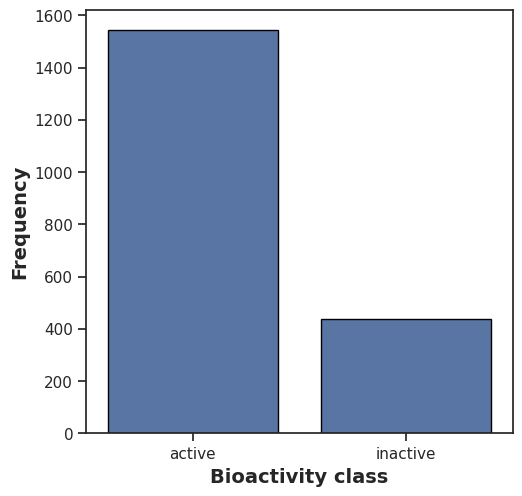

In [68]:
plt.figure(figsize=(5.5,5.5))

sns.countplot(x='bio_class',data=df_2class,edgecolor='black')

plt.xlabel('Bioactivity class',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

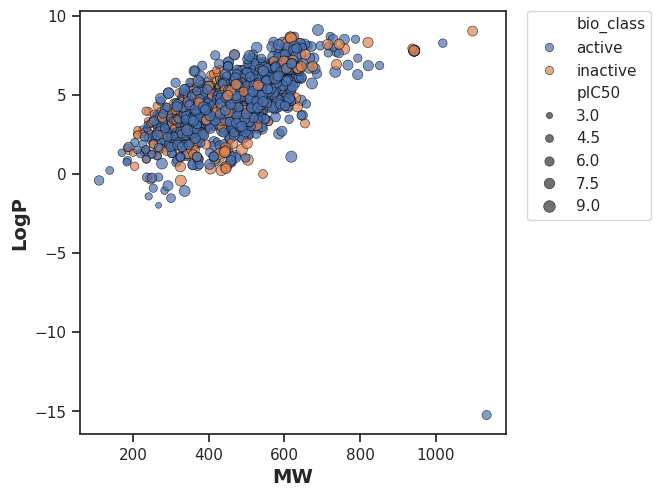

In [69]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bio_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

In [70]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

  seed(1)

  selection =[descriptor,'bio_class']
  df = df_2class[selection]
  active = df[df.bio_class == 'active']
  active = active[descriptor]


  inactive = df[df.bio_class == 'inactive']
  inactive = inactive[descriptor]
  if len(active) == 0 or len(inactive) == 0:
    raise ValueError(f"One of the arrays is empty: active={len(active)}, inactive={len(inactive)}")

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

Text(0, 0.5, 'pIC50 value')

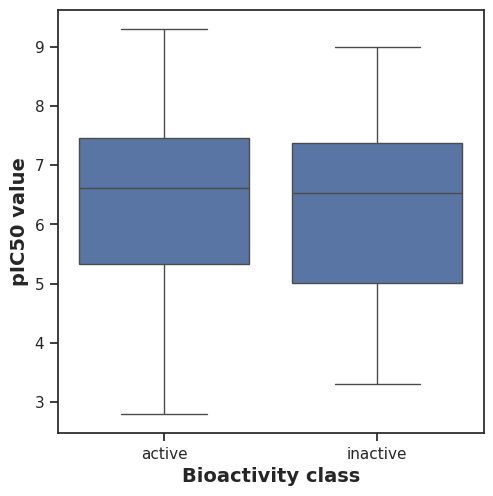

In [71]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bio_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')



In [74]:
mannwhitney('pIC50')


  Descriptor  Statistics         p  alpha                      Interpretation
0      pIC50    363489.0  0.020218   0.05  Different distribution (reject H0)


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,388845.0,0.000002,0.05,Different distribution (reject H0)


In [77]:
mannwhitney('LogP')


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,361281.0,0.034568,0.05,Different distribution (reject H0)


In [78]:
mannwhitney('NumHAcceptors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,388845.0,0.000002,0.05,Different distribution (reject H0)


In [75]:
mannwhitney('MW')


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,390403.0,0.000001,0.05,Different distribution (reject H0)


In [76]:
mannwhitney('NumHDonors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,343543.5,0.639392,0.05,Same distribution (fail to reject H0)


Text(0, 0.5, 'NumHDonors')

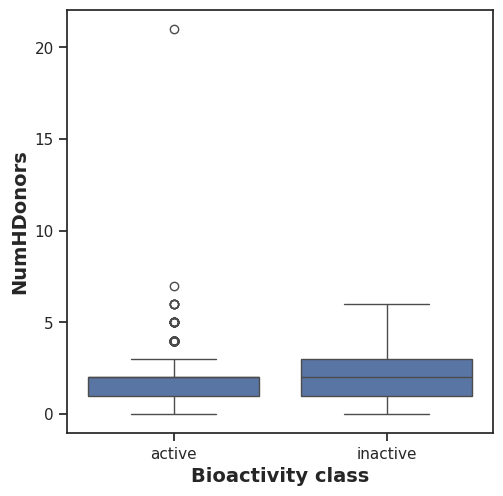

In [79]:


plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bio_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')




Text(0.5, 0, 'pIC50 values')

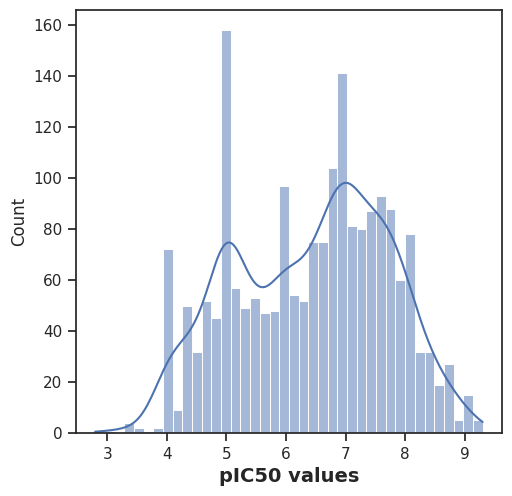

In [138]:
y_o = df_2class['pIC50']
plt.figure(figsize=(5.5, 5.5))
sns.histplot(y_o, bins=40, kde=True)
plt.xlabel('pIC50 values', fontsize=14, fontweight='bold')


R-squared (Random Forest) [Cross-validation mean]: 0.998969093781206
Mean Squared Error (Random Forest) [Cross-validation mean]: 0.0016965994706262544


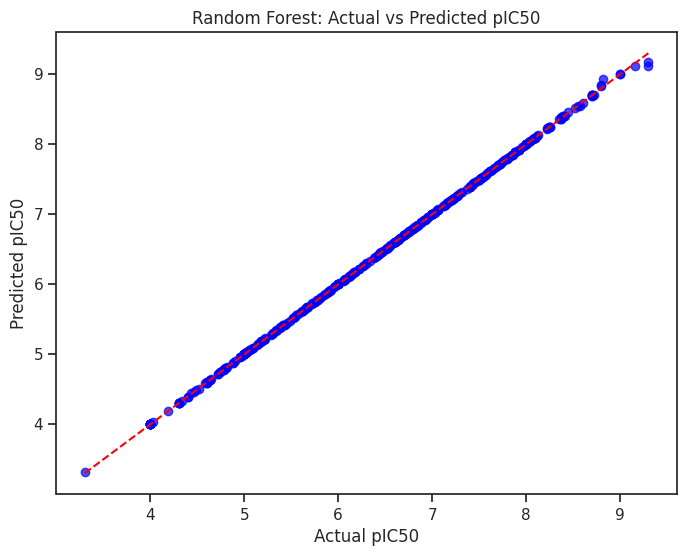

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

df = df_2class

X = df[['MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'standard_value_norm']]
y = df['pIC50']

X['interaction_term'] = X['MW'] * X['LogP']
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train-test split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Cross-validation scores
rf_cv = cross_validate(rf, X_poly, y, cv=5, scoring='neg_mean_squared_error')
rf_r2 = cross_val_score(rf, X_poly, y, cv=5, scoring='r2')

print(f"R-squared (Random Forest) [Cross-validation mean]: {rf_r2.mean()}")
print(f"Mean Squared Error (Random Forest) [Cross-validation mean]: {-rf_cv['test_score'].mean()}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual pIC50')
plt.ylabel('Predicted pIC50')
plt.title('Random Forest: Actual vs Predicted pIC50')
plt.show()


Accuracy (Random Forest) [Cross-validation mean]: 0.7221726076889804
Accuracy (Random Forest) [Cross-validation mean]: -0.7221726076889804
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       316
           1       0.58      0.27      0.37        81

    accuracy                           0.81       397
   macro avg       0.71      0.61      0.63       397
weighted avg       0.78      0.81      0.78       397



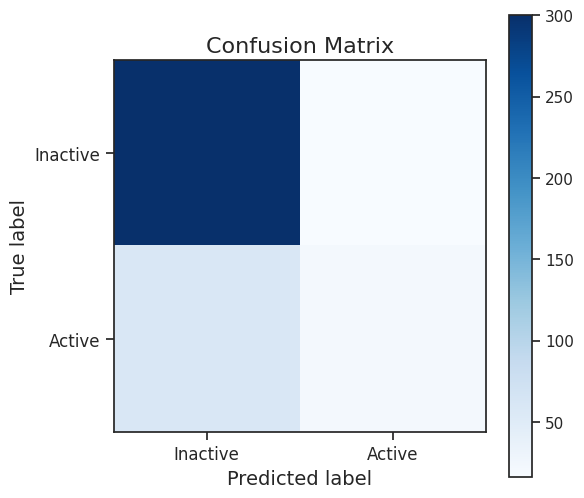

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset
df = df_2class

# Features and target
X = df[['MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'standard_value_norm']]
y = df['bio_class']

# Polynomial features for capturing non-linear relationships
X['interaction_term'] = X['MW'] * X['LogP']
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train-test split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize LabelEncoder for converting categorical target variable into numeric
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Random Forest Classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Cross-validation scores for accuracy
rf_cv = cross_validate(rf, X_poly, y, cv=5, scoring='accuracy')
rf_accuracy = cross_val_score(rf, X_poly, y, cv=5, scoring='accuracy')

# Print Cross-validation results
print(f"Accuracy (Random Forest) [Cross-validation mean]: {rf_accuracy.mean()}")
print(f"Accuracy (Random Forest) [Cross-validation mean]: {-rf_cv['test_score'].mean()}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix", fontsize=16)
plt.colorbar()
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.xticks([0, 1], ['Inactive', 'Active'], fontsize=12)
plt.yticks([0, 1], ['Inactive', 'Active'], fontsize=12)
plt.show()
